# Table of Contents
- [Data Understanding]()
- [Import Python Libraries]()
- [Import Dataset]()
- [Data Description]()
- [Data Preprocessing]()
- [Exploratory Data Analysis]()
- [K-Means Model]()
- [Elbow Method]()
- [Silhoutte Score]()
- [Fitting K-Means Model with K=]()
- [Clusters Analysis]()
- [Summaries]()
- [References]()

# Data Understanding
## Bank Customer Segmentation
Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

## About this Dataset
This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

## Interesting Analysis Ideas
The dataset can be used for different analysis, example:
1. Customer Recency, Frequency, Monetary analysis
2. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules.

# Import Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

import warnings

warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
df = pd.read_csv("../data/raw/bank_transactions.csv.zip")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


# Data Description

## Dataset shape

In [3]:
df.shape

(1048567, 9)

## Dataset's column type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


## Checking duplicated rows

In [3]:
if True in df.duplicated().tolist():
    print("There are duplicate rows in the dataset!")
else:
    print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


## Checking categorical values

In [6]:
categorical_columns=["CustGender", "CustLocation"]

for col in categorical_columns:
    print("Unique values for column '{}': {}\n".format(col, df[col].unique()))

Unique values for column 'CustGender': ['F' 'M' nan 'T']

Unique values for column 'CustLocation': ['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']



## Checking the distribution of numerical values

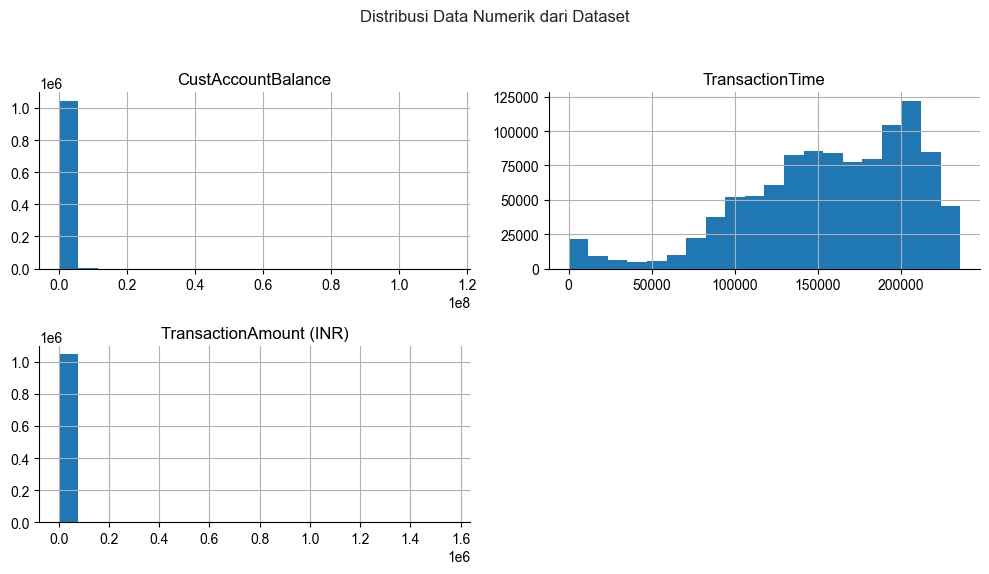

In [7]:
numerical_column = ["CustAccountBalance", "TransactionTime", "TransactionAmount (INR)"]

# facet & geometric object
ax = df[numerical_column].hist(figsize=(10, 6), bins=20)

# aesthetics
sns.set_style("ticks")
sns.despine()
plt.suptitle("Distribusi Data Numerik dari Dataset")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Checking Outliers in Numerical Columns

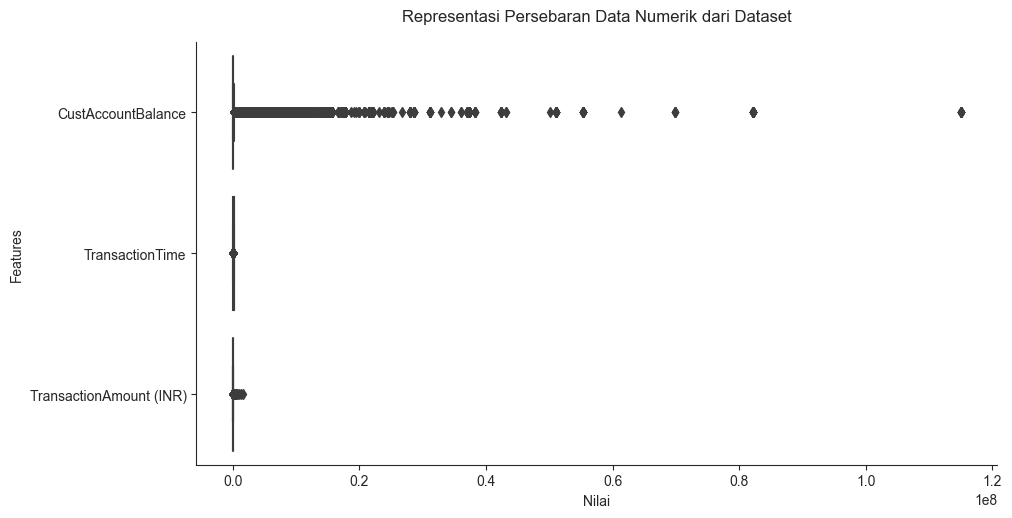

In [8]:
# facet
plt.figure(figsize=(10, 5))

# geometric object
sns.boxplot(data=df[numerical_column], orient="h")

# aesthetics
sns.set_style("whitegrid")
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Representasi Persebaran Data Numerik dari Dataset", pad=15)
plt.ylabel("Features")
plt.xlabel("Nilai")
plt.xticks(rotation=360)
plt.show()


## Checking Descriptive Statistics for Numerical Columns

In [9]:
df[numerical_column].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


## Checking Correlation in Numerical Columns

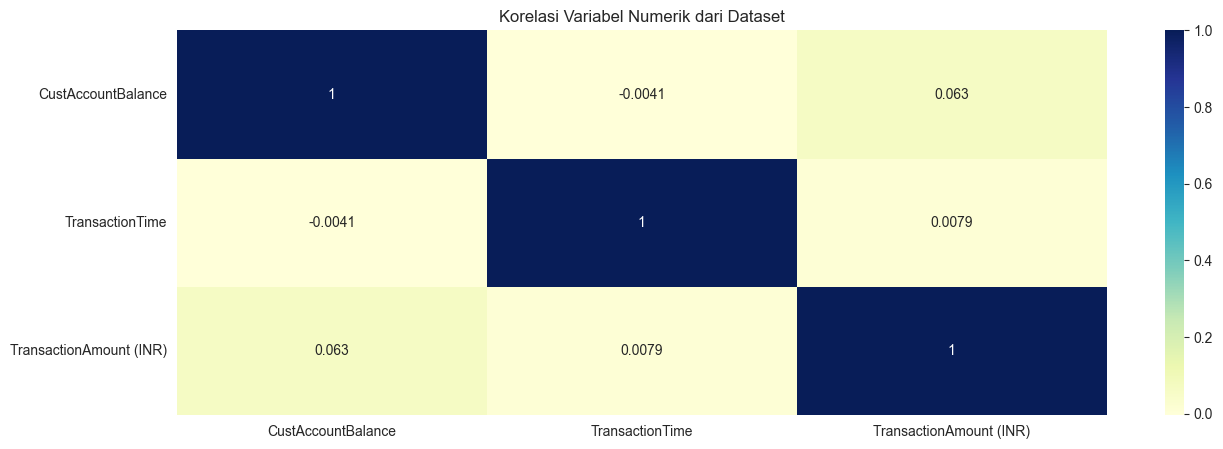

In [10]:
plt.figure(figsize=(15, 5))
sns.heatmap(df[numerical_column].corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi Variabel Numerik dari Dataset")
plt.show()

# Exploratory Data Analysis

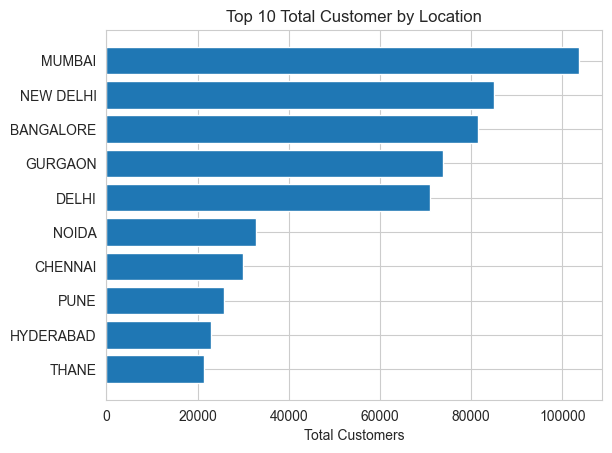

In [11]:
top10_location_counts = df["CustLocation"].value_counts().head(10)
top10_location_counts = top10_location_counts.sort_values(ascending=True)
plt.barh(top10_location_counts.index, top10_location_counts.values)
plt.title("Top 10 Total Customer by Location")
plt.xlabel("Total Customers")
plt.show()

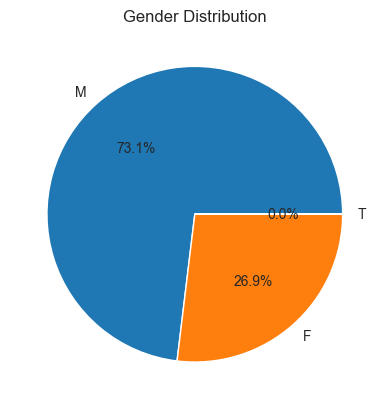

In [12]:
# Menghitung jumlah masing-masing gender
gender_counts = df['CustGender'].value_counts()

# Membuat pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Menambahkan judul
plt.title('Gender Distribution')

# Menampilkan plot
plt.show()

# Data Preprocessing

## Handling Missing Values

In [13]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

<Axes: >

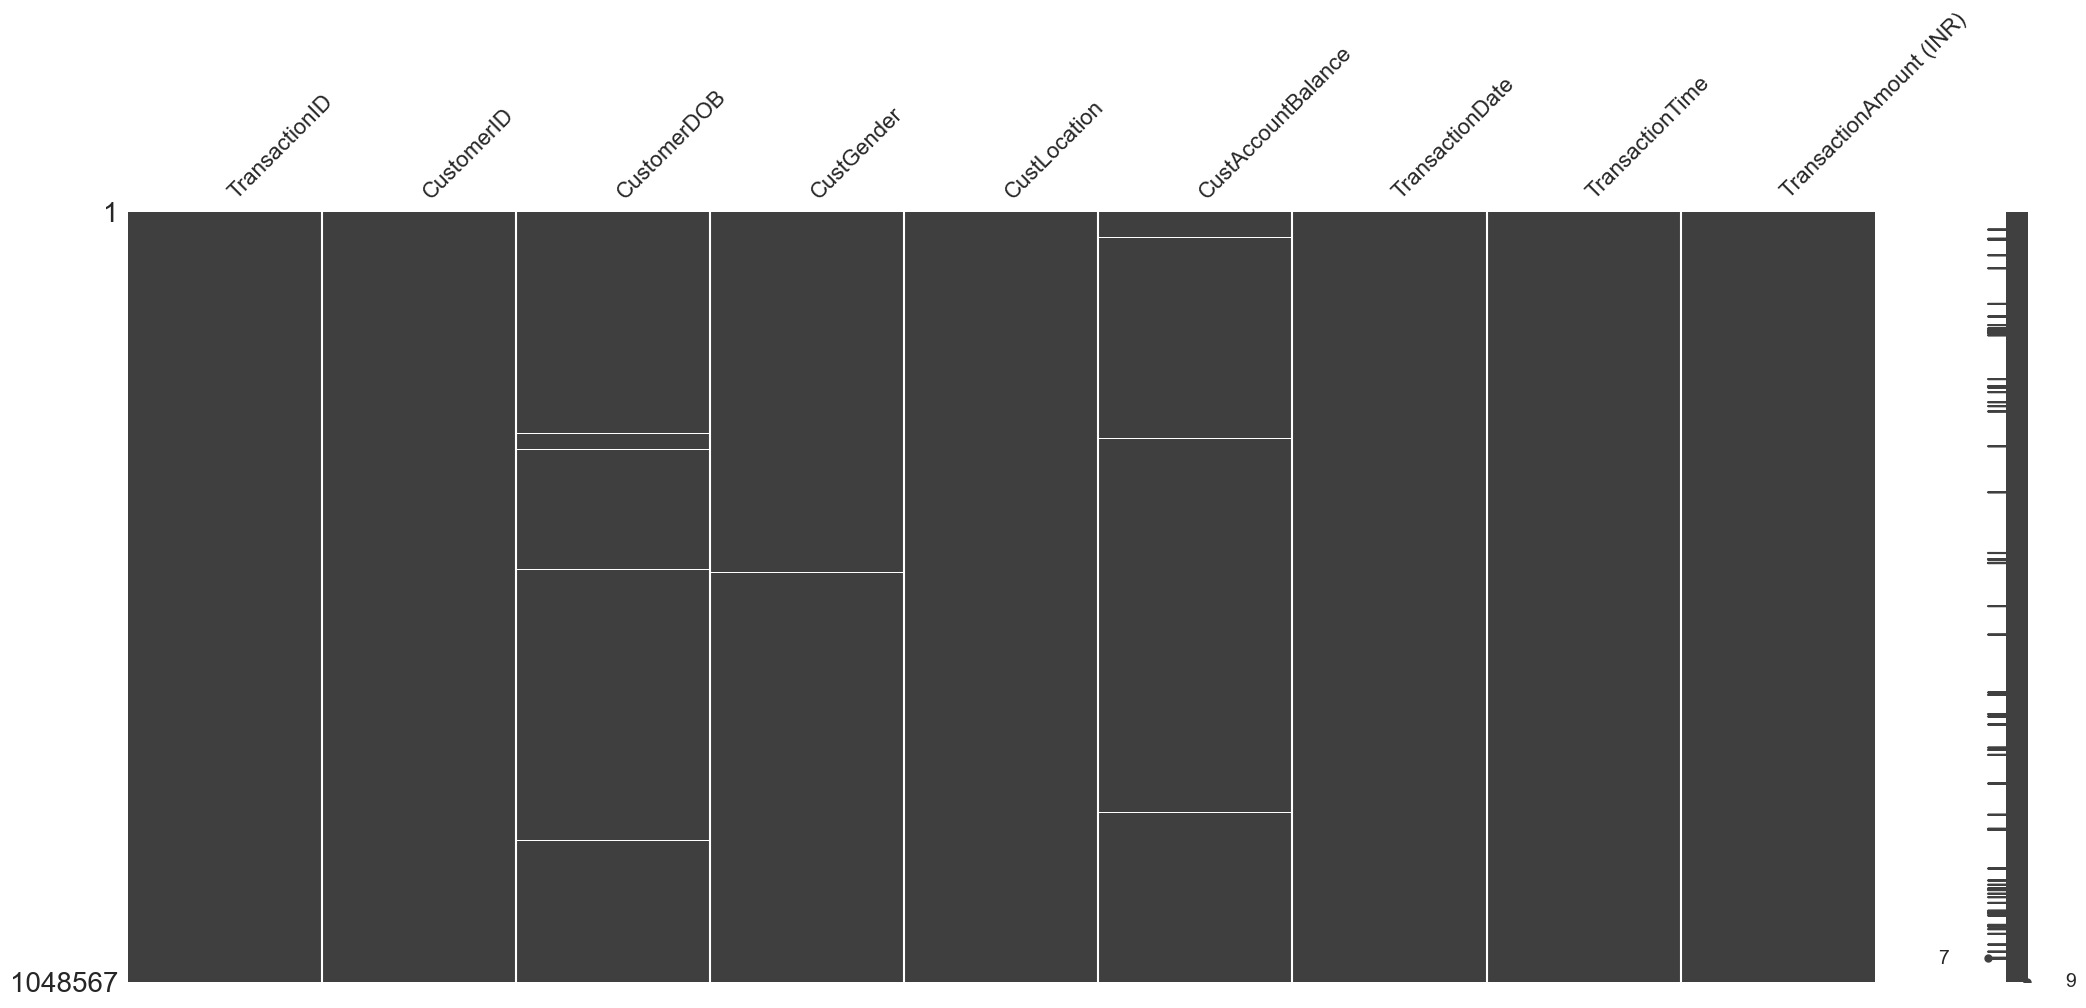

In [14]:
msno.matrix(df)

In [15]:
filtered_df = df.copy()

filtered_df["CustomerDOB"].fillna(df["CustomerDOB"].mode()[0], inplace=True)
filtered_df["CustGender"].fillna(df["CustGender"].mode()[0], inplace=True)
filtered_df["CustLocation"].fillna(df["CustLocation"].mode()[0], inplace=True)
filtered_df["CustAccountBalance"].fillna(df["CustAccountBalance"].median(), inplace=True)

## Handling Outliers

In [16]:
for column in numerical_column:
    data = filtered_df[column]

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3-q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

## Convert Datatype

In [17]:
filtered_df = filtered_df.loc[~(filtered_df['CustomerDOB'] == '1/1/1800')]
filtered_df['CustomerDOB'] = pd.to_datetime(filtered_df['CustomerDOB'], format = '%d/%m/%y')
filtered_df['TransactionDate'] = pd.to_datetime(filtered_df['TransactionDate'], format = '%d/%m/%y')

## RFM Dataframe

In [18]:
filtered_df['CustomerAge'] = filtered_df['TransactionDate'].dt.year - filtered_df['CustomerDOB'].dt.year
filtered_df['TransactionDateFirst'] = filtered_df['TransactionDate'] # to calculate the minimum (first transaction)
filtered_df['TransactionDateLast'] = filtered_df['TransactionDate'] # to calculate the maximum (last transaction)

In [19]:
#Creating MRF Table Strategy

MRF_df = filtered_df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDateFirst":"min",
                                        "TransactionDateLast":"max",
                                        "TransactionDate":"median"
                        })

MRF_df = MRF_df.reset_index()
MRF_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDateFirst,TransactionDateLast,TransactionDate
0,C1010011,1,M,NEW DELHI,120180.540,356.0,33.0,2016-08-09,2016-08-09,2016-08-09 00:00:00
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14 00:00:00
2,C1010014,1,F,MUMBAI,38377.140,1205.0,24.0,2016-08-01,2016-08-01,2016-08-01 00:00:00
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15 00:00:00
4,C1010031,2,M,VAPI,5200.155,932.0,30.0,2016-08-03,2016-08-04,2016-08-03 12:00:00


In [20]:
MRF_df.rename(columns={"TransactionID":"Frequency"},inplace=True)
MRF_df['Recency']=MRF_df['TransactionDateLast']-MRF_df['TransactionDateFirst']
MRF_df['Recency']=MRF_df['Recency'].astype(str)

In [21]:
MRF_df.head()

,CustomerID,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDateFirst,TransactionDateLast,TransactionDate,Recency
0,C1010011,1,M,NEW DELHI,120180.540,356.0,33.0,2016-08-09,2016-08-09,2016-08-09 00:00:00,0 days
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14 00:00:00,0 days
2,C1010014,1,F,MUMBAI,38377.140,1205.0,24.0,2016-08-01,2016-08-01,2016-08-01 00:00:00,0 days
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15 00:00:00,0 days
4,C1010031,2,M,VAPI,5200.155,932.0,30.0,2016-08-03,2016-08-04,2016-08-03 12:00:00,1 days


In [22]:
import re
MRF_df['Recency']=MRF_df['Recency'].apply(lambda x :re.search('\d+',x).group())
MRF_df['Recency']=MRF_df['Recency'].astype(int)

In [23]:
def rep_0(i):
    if i==0:
        return 1
    else:
        return i
MRF_df['Recency']=MRF_df['Recency'].apply(rep_0)

In [24]:
MRF_df.drop(columns=["TransactionDateFirst","TransactionDateLast"],inplace=True)

In [25]:
MRF_df.drop(columns=["CustomerID"],inplace=True)

In [26]:
MRF_df=MRF_df.reset_index(drop=True)

In [27]:
MRF_df.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,1,M,NEW DELHI,120180.540,356.0,33.0,2016-08-09 00:00:00,1
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14 00:00:00,1
2,1,F,MUMBAI,38377.140,1205.0,24.0,2016-08-01 00:00:00,1
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15 00:00:00,1
4,2,M,VAPI,5200.155,932.0,30.0,2016-08-03 12:00:00,1


In [28]:
MRF_df.drop(columns=['CustLocation','TransactionDate'],inplace=True)

In [29]:
MRF_df['CustGender']=MRF_df['CustGender'].map({'M':1,'F':0})

In [30]:
MRF_df.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,1,1,120180.540,356.0,33.0,1
1,1,1,24204.490,1499.0,22.0,1
2,1,0,38377.140,1205.0,24.0,1
3,1,0,496.180,30.0,26.0,1
4,2,1,5200.155,932.0,30.0,1


## Data Tranformation

In [31]:
from sklearn.preprocessing import StandardScaler

# data scaling
df_scaled=StandardScaler().fit_transform(MRF_df)
df_scaled=pd.DataFrame(df_scaled,columns=MRF_df.columns)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,-0.354076,0.604799,3.562760,-0.309190,0.467009,-0.28972
1,-0.354076,0.604799,0.056164,1.911635,-0.286717,-0.28972
2,-0.354076,-1.653441,0.573978,1.340399,-0.149676,-0.28972
3,-0.354076,-1.653441,-0.810046,-0.942601,-0.012635,-0.28972
4,2.292091,0.604799,-0.638181,0.809966,0.261447,-0.28972


In [32]:
df_scaled=df_scaled.sample(n=100000,random_state=42).reset_index(drop=True)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,-0.354076,-1.653441,-0.529870,-0.962031,-0.218197,-0.28972
1,-0.354076,-1.653441,3.641327,-0.777448,-0.081156,-0.28972
2,-0.354076,0.604799,0.329836,-0.715273,0.261447,-0.28972
3,-0.354076,0.604799,0.959147,-0.806593,-0.149676,-0.28972
4,-0.354076,0.604799,3.054603,1.132500,0.055886,-0.28972


# K-Means

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [34]:
# instatiate the clustering model and visualizer
cluster_model = KMeans(random_state=42)

## Elbow Method

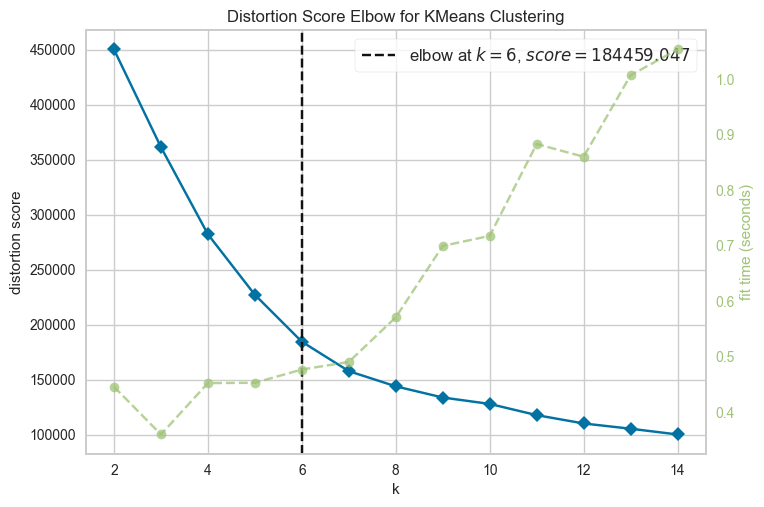

In [35]:
visualizer = KElbowVisualizer(cluster_model, k=(2, 15))
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render the figure
plt.show()

In [36]:
kmeans = KMeans(n_clusters=6)    
kmeans.fit(df_scaled)
df_scaled['Label']=kmeans.labels_
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency,Label
0,-0.354076,-1.653441,-0.529870,-0.962031,-0.218197,-0.28972,1
1,-0.354076,-1.653441,3.641327,-0.777448,-0.081156,-0.28972,0
2,-0.354076,0.604799,0.329836,-0.715273,0.261447,-0.28972,2
3,-0.354076,0.604799,0.959147,-0.806593,-0.149676,-0.28972,2
4,-0.354076,0.604799,3.054603,1.132500,0.055886,-0.28972,0


## Karakteristik Klaster 0

In [ ]:
df_scaled[df_scaled['Label']==0].loc[:,:"Recency"]

In [1]:
import plotly.express as px

clas_0 = df_scaled[df_scaled['Label']==0].loc[:,:"Recency"]

fig = px.line_polar(df_scaled,
                    r = clas_0.mean().tolist(),
                    theta = clas_0.columns.tolist(),
                    line_close = True)
fig.show()

NameError: name 'df_scaled' is not defined

In [37]:
import plotly.express as px

clas_0 = df_scaled[df_scaled['Label']==0].loc[:,:"Recency"]

fig = px.line_polar(clas_0,
                    r = clas_0.mean().tolist(),
                    theta = clas_0.columns.tolist(),
                    line_close = True)
fig.show()

## Karakteristik Klaster 1

In [39]:
clas_1

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,-0.354076,-1.653441,-0.529870,-0.962031,-0.218197,-0.28972
7,-0.354076,-1.653441,-0.580413,-0.778517,0.741091,-0.28972
17,-0.354076,-1.653441,-0.743630,-0.145980,-0.081156,-0.28972
19,-0.354076,-1.653441,0.070838,1.216048,0.329968,-0.28972
24,-0.354076,-1.653441,-0.825568,-0.359708,0.261447,-0.28972
...,...,...,...,...,...,...
99976,-0.354076,-1.653441,-0.151890,-0.218842,0.124406,-0.28972
99977,-0.354076,-1.653441,-0.702362,0.874084,0.261447,-0.28972
99982,-0.354076,-1.653441,0.218902,-0.515146,-0.012635,-0.28972
99987,-0.354076,-1.653441,1.072071,0.464116,-0.012635,-0.28972


In [38]:
import plotly.express as px

clas_1 = df_scaled[df_scaled['Label']==1].loc[:,:"Recency"]

fig = px.line_polar(clas_1,
                    r = clas_1.mean().tolist(),
                    theta = clas_1.columns.tolist(),
                    line_close = True)
fig.show()

## Karakteristik Klaster 2

## Karakteristik Klaster 3

## Karakteristik Klaster 4

## Karakteristik Klaster 5

## Karakteristik Klaster 6

# References
- [Kaggle Dataset](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation?resource=download)
- 